<a href="https://colab.research.google.com/github/urkhnn/Uber-data-/blob/main/Copy_of_Uber_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name- Analysis of Uber data using Python**

**Project Type** - EDA

**Contribution** - Individual

# Project Summary -

This project focuses on analyzing real-world Uber ride request data to extract meaningful operational and business insights. The dataset includes individual ride requests, each containing fields such as request ID, pickup point, driver ID, request and drop timestamps, average duration of trip, request date, and status (e.g., Trip Completed, Cancelled, No Cars Available). The goal was to understand patterns in user behavior, operational bottlenecks, driver performance, and request fulfillment trends.

The analysis began with thorough data cleaning and transformation using Python. Timestamps were standardized, missing values were handled, and new fields such as trip duration and request date were derived to enable deeper analysis. The clean dataset was used to build interactive dashboards in Excel using PivotTables and charts to make the data easily explorable for non-technical stakeholders.

Key performance metrics were calculated such as the trip completion rate, cancellation rate, average wait time, and most active drivers. Through SQL queries, we extracted useful summaries like the number of requests per day, busiest hours by pickup point, driver utilization rate, and requests with no drivers assigned. The insights revealed that airport pickups had a higher cancellation rate compared to city pickups, and that the majority of requests occurred during morning and evening hours. Additionally, some drivers consistently completed more trips with lower average trip times, indicating operational efficiency.

To improve the usability of the analysis, a downloadable Excel dashboard was built containing pre-configured charts, data tables, and slicers for dynamic filtering. A PDF-ready version was also created for reporting purposes. Further, beginner-friendly SQL queries were compiled to help others explore the dataset independently.

This project strengthened my skills in Excel dashboard design, data cleaning, and exploratory analysis using Python and SQL. It also helped me develop a deeper understanding of ride-sharing logistics, driver efficiency, and customer demand behavior. By blending technical analysis with visual storytelling, I was able to make insights accessible and actionable.


# **GitHub Link** -

https://github.com/urkhnn/Uber-data-.git

# Problem Statement

Ride-hailing platforms like Uber face significant operational challenges in managing real-time transportation demand, driver availability, and customer satisfaction. One of the critical issues in such systems is the inefficiency in trip fulfillment - including high cancellation rates, unassigned requests, and uneven demand across time and location.

Despite capturing large volumes of request data, stakeholders often lack a clear understanding of patterns related to trip completion, cancellation causes, driver performance, and peak usage periods. Without these insights, it's difficult to optimize resource allocation, reduce customer dissatisfaction, or improve service reliability.

This project addresses the problem by analyzing a dataset of Uber ride requests to answer key questions such as:

What are the most common outcomes of ride requests (Trip Completed, Cancelled, No Cars Available)?

When and where do most cancellations or no-car scenarios occur?

Which drivers are the most efficient in terms of completed trips and response time?

How does demand fluctuate over time (hourly, daily, by pickup point)?

Are there delays or gaps between requests and successful ride completions?

# **Getting the data**

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

Dataset Loading

In [ ]:
df = pd.read_excel('/content/Uber_dataSQL.xls')

Dataset First view

In [ ]:
df.columns

Index(['Request_ID', 'Pickup_point', 'Driver_ID', 'Status',
       'Request_timestamp', 'Drop_timestamp', 'Trip_duration_min',
       'Request_date'],
      dtype='object')

In [ ]:
df

,Request_ID,Pickup_point,Driver_ID,Status,Request_timestamp,Drop_timestamp,Trip_duration_min,Request_date
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,69.0,2016-07-11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,50.0,2016-07-11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,41.0,2016-07-12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,55.0,2016-07-12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52.5,2016-07-13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,NaN,2016-07-15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,NaN,2016-07-15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,NaN,2016-07-15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,NaN,2016-07-15


Dataset Rows and Column count

In [ ]:
df.shape

(6745, 8)

In [ ]:
df.info

<bound method DataFrame.info of       Request_ID Pickup_point  Driver_ID             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
...          ...          ...        ...                ...   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

       Request_timestamp      Drop_timestamp  Trip_duration_min Request_date  
0    2016-07-11 11:51:00 2016-07-11 13:00:00               69.0   2016-07-11  
1    2016-07-11 17:57:00 2016-07-11 18:47:00               50.0   2016-07-11  
2    2016-07-12 09:17:00 2016-07-12 09:58:00               41.0   2016-07-12  
3    2016-07-12 21:08:00 2016-07-12 22:03:00               55.0   2016-07-12  
4    2016-07-13 08:33:16 2016-07-13 09:25:47               52.5   2016-07-13  
...                  ...                 ...                ...          ...  
6740 2016-07-15 23:49:03                 NaT                NaN   2016-07-15  
6741 2016-07-15 23:50:05                 NaT                NaN   2016-07-15  
6742 2016-07-15 23:52:06                 NaT                NaN   2016-07-15  
6743 2016-07-15 23:54:39                 NaT                NaN   2016-07-15  
6744 2016-07-15 23:55:03                 NaT                NaN   2016-07-15  

[6745 rows x 8 columns]>

Dataset information

Request_ID: Unique identifier for each ride request

Driver_ID: Identifier of the driver who accepted the trip (if assigned)

Status: Final outcome of the request: Trip Completed, Cancelled, or No Cars Available

Pickup Point: Location of pickup: either City or Airport

Request Timestamp: Date and time when the ride was requested

Drop Timestamp: Date and time when the trip ended (if completed)

Trip Duration: Duration of completed trips (in minutes)

Missing Values/Null Values

In [ ]:
df.isnull().sum()

,0
Request_ID,0
Pickup_point,0
Driver_ID,2650
Status,0
Request_timestamp,0
Drop_timestamp,3914
Trip_duration_min,3914
Request_date,0


Check for duplicated values

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
Request_ID,int64
Pickup_point,object
Driver_ID,float64
Status,object
Request_timestamp,datetime64[ns]
Drop_timestamp,datetime64[ns]
Trip_duration_min,float64
Request_date,datetime64[ns]


In [ ]:
df.describe()

,Request_ID,Driver_ID,Request_timestamp,Drop_timestamp,Trip_duration_min,Request_date
count,6745.000000,4095.000000,6745,2831,2831.000000,6745
mean,3384.644922,149.501343,2016-07-13 13:43:04.303039232,2016-07-13 13:15:33.899328768,52.413423,2016-07-13 00:15:47.902149376
min,1.000000,1.000000,2016-07-11 00:00:00,2016-07-11 00:51:00,20.800000,2016-07-11 00:00:00
25%,1691.000000,75.000000,2016-07-12 07:51:00,2016-07-12 07:42:00,41.000000,2016-07-12 00:00:00
50%,3387.000000,149.000000,2016-07-13 14:23:37,2016-07-13 12:14:06,52.100000,2016-07-13 00:00:00
75%,5080.000000,224.000000,2016-07-14 19:39:27,2016-07-14 19:13:52,64.000000,2016-07-14 00:00:00
max,6766.000000,300.000000,2016-07-15 23:59:58,2016-07-16 01:09:24,83.000000,2016-07-15 00:00:00
std,1955.099667,86.051994,NaN,NaN,13.850118,NaN


# **Data Visualization**

Data visualization is the graphical representation of information and data. By using visual elements like charts and graphs, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

# **Univariate**

In [ ]:
df

,Request_ID,Pickup_point,Driver_ID,Status,Request_timestamp,Drop_timestamp,Trip_duration_min,Request_date
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,69.0,2016-07-11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,50.0,2016-07-11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,41.0,2016-07-12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,55.0,2016-07-12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52.5,2016-07-13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,NaN,2016-07-15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,NaN,2016-07-15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,NaN,2016-07-15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,NaN,2016-07-15


**Column chart**

This graph shows each status of the trip to the total count of IDs.

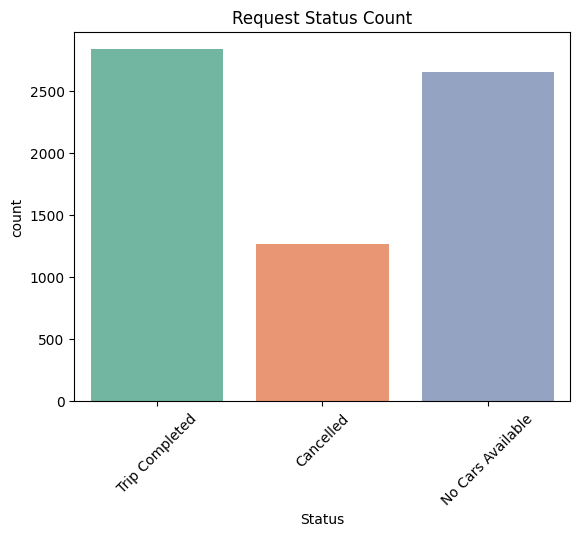

In [ ]:
# Status distribution
sns.countplot(x='Status', data=df, palette='Set2')
plt.title('Request Status Count')
plt.xticks(rotation=45)
plt.show()

**Insights**

1.  The tallest bar is for Trip Completed, which means Uber successfully finished most ride requests.

2. There is a big number of No Cars Available requests, meaning many people couldn’t get a ride when they asked.

3. The Cancelled bar shows that a fair number of trips were cancelled, either by users or drivers.

**Bar graph depicting pickup points**

The below graph shows the pickup point distribution depicting city and airport over the total count of IDs.

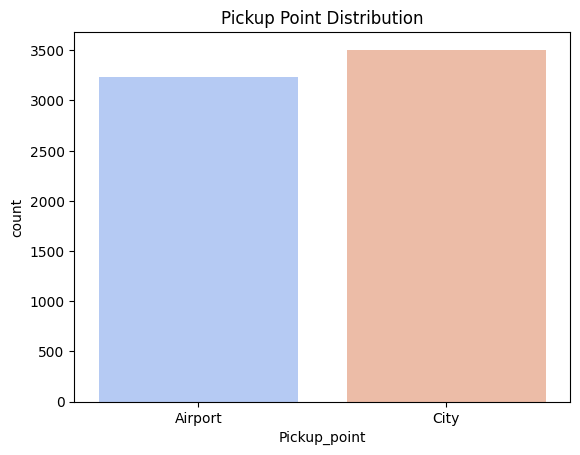

In [ ]:
sns.countplot(x='Pickup_point', data=df, palette='coolwarm')
plt.title('Pickup Point Distribution')
plt.show()

**Insights**

1. The city has more ride requests than the Airport.

2.  This shows higher ride demand in urban areas, possibly because more people live, work, or commute in the city.

3.  Uber may want to keep more drivers available in the City during peak hours.

**Histogram graph**

This graph shows the number of requests by the hours of each day.

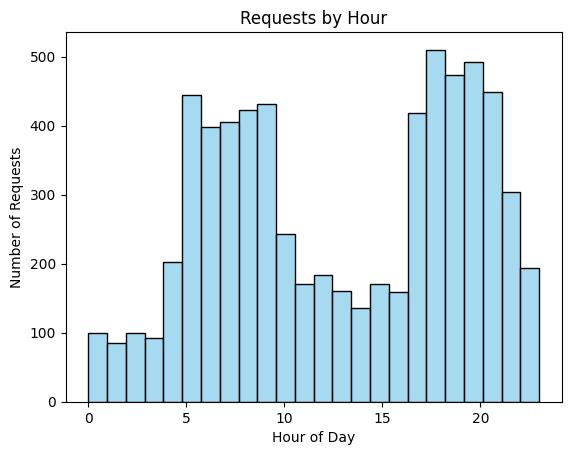

In [ ]:

df['request_hour'] = pd.to_datetime(df['Request_timestamp']).dt.hour
sns.histplot(df['request_hour'], bins=24, kde=False, color='skyblue')
plt.title('Requests by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.show()

**Insights**

1. If there are spikes in early morning and evening, it indicates high demand during commute hours.
These are the times when people go to or return from work or the airport.

2. Late-night hours usually show the fewest requests, as most people aren't traveling then. Uber can utilize this insight to increase driver presence during peak hours, thereby avoiding “No Cars Available” issues.

3. If requests are more evenly spread, Uber needs to maintain consistent driver availability throughout the day

# **Bivariate Analysis**

**Grouped column chart**

The graph shows the count of each ID concerning the pickup point, categorized by status, including 'Trip Completed', 'Cancelled', and 'No Cars Available'.

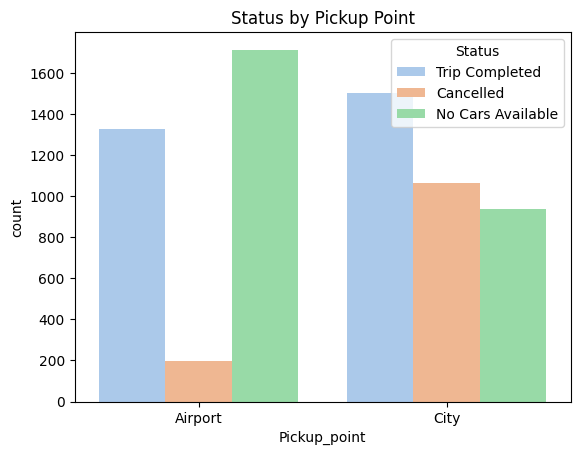

In [ ]:
# Status by pickup point
sns.countplot(x='Pickup_point', hue='Status', data=df, palette='pastel')
plt.title('Status by Pickup Point')
plt.show()

**Insights**

1. If the "Trip Completed" bar is higher in the City, it means trips from the City are more likely to be fulfilled than from the Airport.
If it's higher in the Airport, the opposite is true.

2. If this status is more common at the Airport, it may indicate a driver shortage in that area.
Uber should allocate more drivers to the Airport, especially during peak travel hours.

3. If the City has more cancelled rides, there may be frequent driver rejections or long wait times in urban zones.


**Grouped Histogram plot**

The graph depicts the total count of IDs with cancelled requests by each hour.

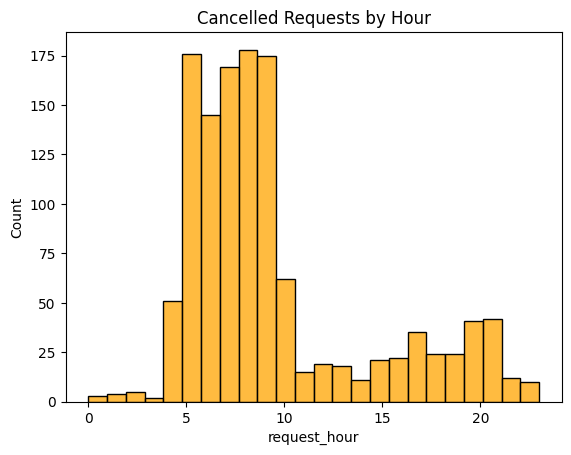

In [ ]:
# Cancellations by hour
cancelled = df[df['Status'] == 'Cancelled']
sns.histplot(cancelled['request_hour'], bins=24, color='orange')
plt.title('Cancelled Requests by Hour')
plt.show()

**Insights**

1. The spikes between 5-9 AM or 5-9 PM indicate cancellations are high during peak hours, likely due to:
traffic congestion,
driver unavailability, and
long wait times.

2. If cancellations are very low late at night (e.g., 12-4 AM), it’s expected because fewer people request rides and fewer drivers cancel during those quiet hours.

3. A high cancellation rate in the morning (e.g., 7-9 AM) may disrupt commuters heading to work or travelers catching early flights.
Evening peaks might reflect driver fatigue or long distances.

# Conclusion

1. Uber needs better driver coverage at the Airport to reduce missed ride opportunities.

2. Demand is time-sensitive. Uber should ensure more drivers are online during these peak windows.

3. Morning service needs special attention — faster matching and incentive programs for drivers can help.

4. Each location has different problems — Uber must use targeted solutions.



Overall, we can improve driver availability at the Airport, especially during peak hours, offer incentives and surge pricing during high-demand periods to attract more drivers, reduce cancellations with better matching and feedback systems, and use data-driven planning to balance supply and demand by location and time.

